<div style=" background-color: RGB(0,114,200);" >
<h1 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">PROJET 4 DATA ANALYST</h1>
<h2 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">Réalisez une étude de santé publique avec R ou Python
</h2>
</div>

# OBJECTIF DE CE NOTEBOOK

Bienvenue dans l'outil plébiscité par les analystes de données Jupyter.

Il s'agit d'un outil permettant de mixer et d'alterner codes, textes et graphique.

Cet outil est formidable pour plusieurs raisons:

+ il permet de tester des lignes de codes au fur et à mesure de votre rédaction, de constater immédiatement le résultat d'un instruction, de la corriger si nécessaire.
+ De rédiger du texte pour expliquer l'approche suivie ou les résultats d'une analyse et de le mettre en forme grâce à du code html ou plus simple avec **Markdown**
+ d'agrémenter de graphiques

Pour vous aider dans vos premiers pas à l'usage de Jupyter et de Python, nous avons rédigé ce notebook en vous indiquant les instructions à suivre.

Il vous suffit pour cela de saisir le code Python répondant à l'instruction donnée.

Vous verrez de temps à autre le code Python répondant à une instruction donnée mais cela est fait pour vous aider à comprendre la nature du travail qui vous est demandée.

Et garder à l'esprit, qu'il n'y a pas de solution unique pour résoudre un problème et qu'il y a autant de résolutions de problèmes que de développeurs ;)...



Note jeremy
Est ce qu'il faut faire le calcul de la sous nutrition sur les pays qu'on a ?
Est ce qu'il faut faire des graphiques ?
Rajouter le soja
La liste des céréales est difficile a trouver ...

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Importation des librairies et chargement des fichiers</h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.1 - Importation des librairies</h3>
</div>

In [4]:
#Importation de la librairie Pandas
import pandas as pd

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.2 - Chargement des fichiers Excel</h3>
</div>

In [5]:
#Importation du fichier population.csv
population = pd.read_csv('population.csv')

#Importation du fichier dispo_alimentaire.csv
dispo_alimentaire = pd.read_csv('dispo_alimentaire.csv')

#Importation du fichier aide_alimentaire.csv
aide_alimentaire = pd.read_csv('aide_alimentaire.csv')

#Importation du fichier sous_nutrition.csv
sous_nutrition = pd.read_csv('sous_nutrition.csv')


<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Analyse exploratoire des fichiers</h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.1 - Analyse exploratoire du fichier population</h3>
</div>

In [6]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(population.shape[0]))
print("Le tableau comporte {} colonne(s)".format(population.shape[1]))

Le tableau comporte 1416 observation(s) ou article(s)
Le tableau comporte 3 colonne(s)


In [7]:
#Consulter le nombre de colonnes
nb_colonnes = population.shape[1]
print ("Nombres de colonnes :", nb_colonnes)

#La nature des données dans chacune des colonnes
print(population.dtypes)

#Le nombre de valeurs présentes dans chacune des colonnes
print(population.count())

Nombres de colonnes : 3
Zone       object
Année       int64
Valeur    float64
dtype: object
Zone      1416
Année     1416
Valeur    1416
dtype: int64


In [8]:
#Affichage les 5 premières lignes de la table
population.head()


,Zone,Année,Valeur
0,Afghanistan,2013,32269.589
1,Afghanistan,2014,33370.794
2,Afghanistan,2015,34413.603
3,Afghanistan,2016,35383.032
4,Afghanistan,2017,36296.113


In [9]:
# Nous allons harmoniser les unités. Pour cela, nous avons décidé de multiplier la population par 1000

#Multiplication de la colonne valeur par 1000
population['Valeur'] = population['Valeur'] * 1000
population.head()


,Zone,Année,Valeur
0,Afghanistan,2013,32269589.0
1,Afghanistan,2014,33370794.0
2,Afghanistan,2015,34413603.0
3,Afghanistan,2016,35383032.0
4,Afghanistan,2017,36296113.0


In [10]:
#changement du nom de la colonne Valeur par Population
population = population.rename(columns={'Valeur': 'Population'})



In [11]:
#Affichage les 5 premières lignes de la table pour voir les modifications
population.head()


,Zone,Année,Population
0,Afghanistan,2013,32269589.0
1,Afghanistan,2014,33370794.0
2,Afghanistan,2015,34413603.0
3,Afghanistan,2016,35383032.0
4,Afghanistan,2017,36296113.0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.2 - Analyse exploratoire du fichier disponibilité alimentaire</h3>
</div>

In [12]:
#Afficher les dimensions du dataset
print("Le tableau contient {} observations." .format(dispo_alimentaire.shape[0]))
print("Le tableau comporte {} colonnes." .format(dispo_alimentaire.shape[1]) )



Le tableau contient 15605 observations.
Le tableau comporte 18 colonnes.


In [13]:
#Consulter le nombre de colonnes
nb_col_dispo_alimentaire = dispo_alimentaire.shape[1]
print ("Nombres de colonnes :", nb_col_dispo_alimentaire)

#La nature des données dans chacune des colonnes
print(dispo_alimentaire.dtypes)

#Le nombre de valeurs présentes dans chacune des colonnes
print(dispo_alimentaire.count())

Nombres de colonnes : 18
Zone                                                              object
Produit                                                           object
Origine                                                           object
Aliments pour animaux                                            float64
Autres Utilisations                                              float64
Disponibilité alimentaire (Kcal/personne/jour)                   float64
Disponibilité alimentaire en quantité (kg/personne/an)           float64
Disponibilité de matière grasse en quantité (g/personne/jour)    float64
Disponibilité de protéines en quantité (g/personne/jour)         float64
Disponibilité intérieure                                         float64
Exportations - Quantité                                          float64
Importations - Quantité                                          float64
Nourriture                                                       float64
Pertes                    

In [14]:
#Affichage les 5 premières lignes de la table
dispo_alimentaire.head()


,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN


In [15]:
#remplacement des NaN dans le dataset par des 0
dispo_alimentaire = dispo_alimentaire.fillna(0)
dispo_alimentaire.head()


,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53.0,0.0,0.0,53.0,0.0,53.0,0.0,0.0,0.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,0.0,0.0,0.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82.0,0.0,82.0,82.0,0.0,0.0,0.0,0.0,0.0


In [16]:
#multiplication de toutes les lignes contenant des milliers de tonnes en Kg
colonnes_tonnes = [
    'Aliments pour animaux',
    'Autres Utilisations',
    'Exportations - Quantité',
    'Importations - Quantité',
    'Nourriture',
    'Pertes',
    'Production',
    'Semences',
    'Traitement',
    'Variation de stock'
]
dispo_alimentaire[colonnes_tonnes] = dispo_alimentaire[colonnes_tonnes] * 1_000_000



In [17]:
#Affichage les 5 premières lignes de la table
dispo_alimentaire.head()


,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53.0,0.0,0.0,53000000.0,0.0,53000000.0,0.0,0.0,0.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41.0,2000000.0,40000000.0,39000000.0,2000000.0,3000000.0,0.0,0.0,0.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2.0,0.0,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82.0,0.0,82000000.0,82000000.0,0.0,0.0,0.0,0.0,0.0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.3 - Analyse exploratoire du fichier aide alimentaire</h3>
</div>

In [18]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s)".format(aide_alimentaire.shape[0]))
print("Le tableau comporte {} colonne(s)".format(aide_alimentaire.shape[1]))


Le tableau comporte 1475 observation(s)
Le tableau comporte 4 colonne(s)


In [19]:
#Consulter le nombre de colonnes
nb_col_aide_alimentaire = aide_alimentaire.shape[1]
print ("Nombres de colonnes :", nb_col_aide_alimentaire)


Nombres de colonnes : 4


In [20]:
#Affichage les 5 premières lignes de la table
aide_alimentaire.head()


,Pays bénéficiaire,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504


In [21]:
#changement du nom de la colonne Pays bénéficiaire par Zone
aide_alimentaire = aide_alimentaire.rename(columns={'Pays bénéficiaire': 'Zone'})
aide_alimentaire.head()


,Zone,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504


In [22]:
#Multiplication de la colonne Aide_alimentaire qui contient des tonnes par 1000 pour avoir des kg
aide_alimentaire['Valeur'] = aide_alimentaire['Valeur'] * 1000


In [23]:
#Affichage les 5 premières lignes de la table
aide_alimentaire.head()


,Zone,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682000
1,Afghanistan,2014,Autres non-céréales,335000
2,Afghanistan,2013,Blé et Farin,39224000
3,Afghanistan,2014,Blé et Farin,15160000
4,Afghanistan,2013,Céréales,40504000


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.3 - Analyse exploratoire du fichier sous nutrition</h3>
</div>

In [24]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s)".format(sous_nutrition.shape[0]))
print("Le tableau comporte {} colonne(s)".format(sous_nutrition.shape[1]))


Le tableau comporte 1218 observation(s)
Le tableau comporte 3 colonne(s)


In [25]:
#Consulter le nombre de colonnes
nb_col_sous_nutrition = sous_nutrition.shape[1]
print ("Nombres de colonnes :", nb_col_sous_nutrition)

#La nature des données dans chacune des colonnes
print(sous_nutrition.dtypes)


Nombres de colonnes : 3
Zone      object
Année     object
Valeur    object
dtype: object


In [26]:
#Afficher les 5 premières lignes de la table
sous_nutrition.head()


,Zone,Année,Valeur
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5


In [27]:
#Conversion de la colonne sous nutrition en numérique
#sous_nutrition['Valeur'] = pd.to_numeric(sous_nutrition['Valeur'])

In [28]:
#Conversion de la colonne (avec l'argument errors=coerce qui permet de convertir automatiquement les lignes qui ne sont pas des nombres en NaN)
sous_nutrition['Valeur'] = pd.to_numeric(sous_nutrition['Valeur'], errors='coerce')
#Puis remplacement des NaN en 0
sous_nutrition['Valeur'] = sous_nutrition['Valeur'].fillna(0)


In [29]:
#changement du nom de la colonne Valeur par sous_nutrition
sous_nutrition = sous_nutrition.rename(columns={'Valeur': 'sous_nutrition'})
sous_nutrition.head()


,Zone,Année,sous_nutrition
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5


In [30]:
#Multiplication de la colonne sous_nutrition par 1000000
sous_nutrition['sous_nutrition'] = sous_nutrition['sous_nutrition'] * 1000000


In [31]:
#Afficher les 5 premières lignes de la table
sous_nutrition.head()

,Zone,Année,sous_nutrition
0,Afghanistan,2012-2014,8600000.0
1,Afghanistan,2013-2015,8800000.0
2,Afghanistan,2014-2016,8900000.0
3,Afghanistan,2015-2017,9700000.0
4,Afghanistan,2016-2018,10500000.0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.1 - Proportion de personnes en sous nutrition</h3>
</div>

In [32]:
# Il faut tout d'abord faire une jointure entre la table population et la table sous nutrition, en ciblant l'année 2017
population_2017 = population[population['Année'] == 2017]
sous_nutrition_2017 = sous_nutrition[sous_nutrition['Année'] == "2016-2018"]
analyse_2017 = pd.merge(population_2017,sous_nutrition_2017,on='Zone')



In [33]:
#Affichage du dataset
analyse_2017.head()



,Zone,Année_x,Population,Année_y,sous_nutrition
0,Afghanistan,2017,36296113.0,2016-2018,10500000.0
1,Afrique du Sud,2017,57009756.0,2016-2018,3100000.0
2,Albanie,2017,2884169.0,2016-2018,100000.0
3,Algérie,2017,41389189.0,2016-2018,1300000.0
4,Allemagne,2017,82658409.0,2016-2018,0.0


In [90]:
#Calcul et affichage du nombre de personnes en état de sous nutrition
total_sous_nutrition = analyse_2017['sous_nutrition'].sum()
print("Le nombre de personnes en état de sous-nutrition en 2017 est de :", f"{total_sous_nutrition:,.0f}".replace(",", " "))

# Somme de la population totale en 2017
population_totale_2017 = analyse_2017['Population'].sum()

# Calcul du pourcentage de personnes en sous-nutrition
pourcentage_sous_nutrition = (total_sous_nutrition / population_totale_2017) * 100

# Affichage du résultat
print("Le pourcentage de personnes en état de sous-nutrition en 2017 est de : {:.2f}%".format(pourcentage_sous_nutrition))


Le nombre de personnes en état de sous-nutrition en 2017 est de : 535 700 000
Le pourcentage de personnes en état de sous-nutrition en 2017 est de : 7.10%


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.2 - Nombre théorique de personne qui pourrait être nourries</h3>
</div>

In [35]:
#Combien mange en moyenne un être humain ?
# 2 100 kcal
# Source =>
# https://www.vidal.fr/sante/nutrition/equilibre-alimentaire-adulte/recommandations-nutritionnelles-adulte.html

kcal_avg = 2100


In [36]:
#On commence par faire une jointure entre le data frame population et Dispo_alimentaire afin d'ajouter dans ce dernier la population
population_dispo_alimentaire = pd.merge(dispo_alimentaire,population_2017,on='Zone', how='left')




In [37]:
#Affichage du nouveau dataframe
population_dispo_alimentaire.head()


,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Année,Population
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53.0,0.0,0.0,53000000.0,0.0,53000000.0,0.0,0.0,0.0,2017.0,36296113.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41.0,2000000.0,40000000.0,39000000.0,2000000.0,3000000.0,0.0,0.0,0.0,2017.0,36296113.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2.0,0.0,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0,2017.0,36296113.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017.0,36296113.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82.0,0.0,82000000.0,82000000.0,0.0,0.0,0.0,0.0,0.0,2017.0,36296113.0


In [38]:
#Création de la colonne dispo_kcal avec calcul des kcal disponibles mondialement

population_dispo_alimentaire['dispo_kcal'] = population_dispo_alimentaire['Disponibilité alimentaire (Kcal/personne/jour)'] * population_dispo_alimentaire['Population']
dispo_kcal = population_dispo_alimentaire['dispo_kcal'].sum()
print("Les kilocalories disponibles mondialement en 2017 sont :", f"{dispo_kcal:,.0f}".replace(",", " "))





Les kilocalories disponibles mondialement en 2017 sont : 20 918 984 627 331


In [39]:
#Calcul du nombre d'humains pouvant être nourris

# Disponibilité calorique mondiale annuelle
dispo_kcal_annuel = dispo_kcal * 365

# Besoins caloriques annuels par personne
kcal_annuelles_par_personne = 2100 * 365

# Nombre d'humains pouvant être nourris sur une année
humains_nourris_annuel = dispo_kcal_annuel / kcal_annuelles_par_personne

print(f"Le nombre d'humains pouvant être nourris sur une année est de : {humains_nourris_annuel / 1e9:.2f} milliards")

Le nombre d'humains pouvant être nourris sur une année est de : 9.96 milliards


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.3 - Nombre théorique de personne qui pourrait être nourrie avec les produits végétaux</h3>
</div>

In [40]:
#Transfert des données avec les végétaux dans un nouveau dataframe

df_vegetaux = population_dispo_alimentaire[population_dispo_alimentaire['Origine'] == 'vegetale']
df_vegetaux.head()


,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,...,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Année,Population,dispo_kcal
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41.0,...,40000000.0,39000000.0,2000000.0,3000000.0,0.0,0.0,0.0,2017.0,36296113.0,36296113.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2.0,...,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0,2017.0,36296113.0,36296113.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017.0,36296113.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82.0,...,82000000.0,82000000.0,0.0,0.0,0.0,0.0,0.0,2017.0,36296113.0,145184452.0
6,Afghanistan,Bière,vegetale,0.0,0.0,0.0,0.09,0.00,0.00,3.0,...,3000000.0,3000000.0,0.0,0.0,0.0,0.0,0.0,2017.0,36296113.0,0.0


In [41]:
#Calcul du nombre de kcal disponible pour les végétaux

df_vegetaux['dispo_kcal'] = df_vegetaux['Disponibilité alimentaire (Kcal/personne/jour)'] * df_vegetaux['Population']
total_kcal_vegetaux = df_vegetaux['dispo_kcal'].sum()
print("Le total des kcal disponibles pour les végétaux est de :", f"{total_kcal_vegetaux:,.0f}".replace(",", " "))


Le total des kcal disponibles pour les végétaux est de : 17 260 764 211 501


<ipython-input-41-10e55abf04f4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vegetaux['dispo_kcal'] = df_vegetaux['Disponibilité alimentaire (Kcal/personne/jour)'] * df_vegetaux['Population']


In [42]:
#Calcul du nombre d'humains pouvant être nourris avec les végétaux

dispo_kcal_annuel_vegetaux = total_kcal_vegetaux * 365

humains_nourris_vegetaux = dispo_kcal_annuel_vegetaux / kcal_annuelles_par_personne

print(f"Le nombre d'humains pouvant être nourris sur une année est de : {humains_nourris_vegetaux / 1e9:.2f} milliards")






Le nombre d'humains pouvant être nourris sur une année est de : 8.22 milliards


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.4 - Utilisation de la disponibilité intérieure</h3>
</div>

In [43]:
#Calcul de la disponibilité totale

total_production = dispo_alimentaire['Production'].sum()
total_importations = dispo_alimentaire['Importations - Quantité'].sum()
total_exportations = dispo_alimentaire['Exportations - Quantité'].sum()
total_variation_stock = dispo_alimentaire['Variation de stock'].sum()

disponibilite_totale = (total_production + total_importations) - (total_exportations + total_variation_stock)

print(f"La disponibilité totale est de : {disponibilite_totale:,.0f}".replace(",", " "))


La disponibilité totale est de : 10 057 977 000 000


In [44]:
#création d'une boucle for pour afficher les différentes valeurs en fonction des colonnes aliments pour animaux, pertes, nourritures,

colonnes = ['Aliments pour animaux', 'Nourriture', 'Pertes']
for colonne in colonnes:
    somme = dispo_alimentaire[colonne].sum()
    print(f"Quantité pour la colonne '{colonne}': {somme/1e9:,.0f} milliards de kg")


Quantité pour la colonne 'Aliments pour animaux': 1,304 milliards de kg
Quantité pour la colonne 'Nourriture': 4,876 milliards de kg
Quantité pour la colonne 'Pertes': 454 milliards de kg


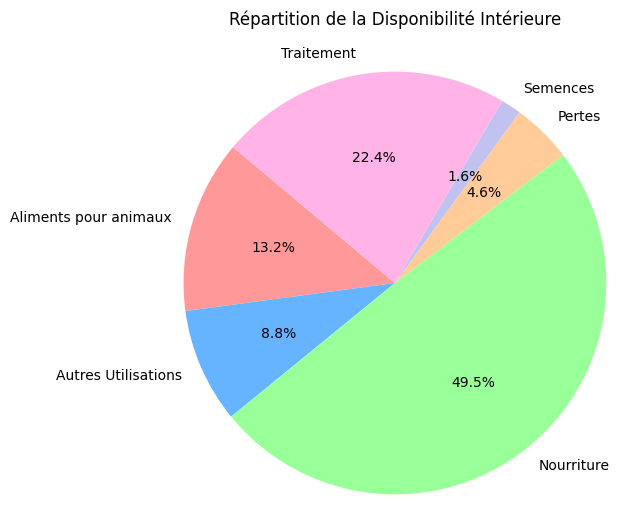

In [45]:
import matplotlib.pyplot as plt

# Calcul des sommes pour chaque catégorie
aliments_animaux = dispo_alimentaire['Aliments pour animaux'].sum()
autres_utilisations = dispo_alimentaire['Autres Utilisations'].sum()
nourriture = dispo_alimentaire['Nourriture'].sum()
pertes = dispo_alimentaire['Pertes'].sum()
semences = dispo_alimentaire['Semences'].sum()
traitement = dispo_alimentaire['Traitement'].sum()

# Liste des catégories et leurs valeurs respectives
categories = ['Aliments pour animaux', 'Autres Utilisations', 'Nourriture', 'Pertes', 'Semences', 'Traitement']
quantites = [aliments_animaux, autres_utilisations, nourriture, pertes, semences, traitement]

# Créer le graphique en secteurs
plt.figure(figsize=(6, 6))
plt.pie(quantites, labels=categories, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0','#ffb3e6'])
plt.title('Répartition de la Disponibilité Intérieure',pad=20)
plt.axis('equal')  # Assurer que le graphique soit un cercle

# Afficher le graphique
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.5 - Utilisation des céréales</h3>
</div>

In [46]:
#Création d'une liste avec toutes les variables

produits_cereales = ['Blé', 'Riz (Eq Blanchi)', 'Orge', 'Millet', 'Seigle', 'Avoine', 'Maïs', 'Sorgho', 'Céréales, Autres']


In [47]:
#Création d'un dataframe avec les informations uniquement pour ces céréales


df_cereales = dispo_alimentaire[dispo_alimentaire['Produit'].isin(produits_cereales)]

df_cereales.head()


,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
7,Afghanistan,Blé,vegetale,0.0,0.0,1369.0,160.23,4.69,36.91,5992.0,0.0,1.173000e+09,4.895000e+09,775000000.0,5.169000e+09,322000000.0,0.0,-350000000.0
12,Afghanistan,"Céréales, Autres",vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.0
32,Afghanistan,Maïs,vegetale,200000000.0,0.0,21.0,2.50,0.30,0.56,313.0,0.0,1.000000e+06,7.600000e+07,31000000.0,3.120000e+08,5000000.0,0.0,0.0
34,Afghanistan,Millet,vegetale,0.0,0.0,3.0,0.40,0.02,0.08,13.0,0.0,0.000000e+00,1.200000e+07,1000000.0,1.300000e+07,0.0,0.0,0.0
40,Afghanistan,Orge,vegetale,360000000.0,0.0,26.0,2.92,0.24,0.79,524.0,0.0,1.000000e+07,8.900000e+07,52000000.0,5.140000e+08,22000000.0,0.0,0.0


In [48]:
#Affichage de la proportion d'alimentation animale
# Somme totale de l'utilisation des céréales pour l'alimentation humaine et animale
total_nourriture_humaine = df_cereales['Nourriture'].sum()
total_aliments_animaux = df_cereales['Aliments pour animaux'].sum()

# Calcul de la proportion des céréales pour l'alimentation animale
proportion_aliments_animaux = total_aliments_animaux / (total_nourriture_humaine + total_aliments_animaux)

# Affichage de la proportion
print(f"Proportion des céréales utilisées pour l'alimentation animale : {proportion_aliments_animaux:.2%}")




Proportion des céréales utilisées pour l'alimentation animale : 45.91%


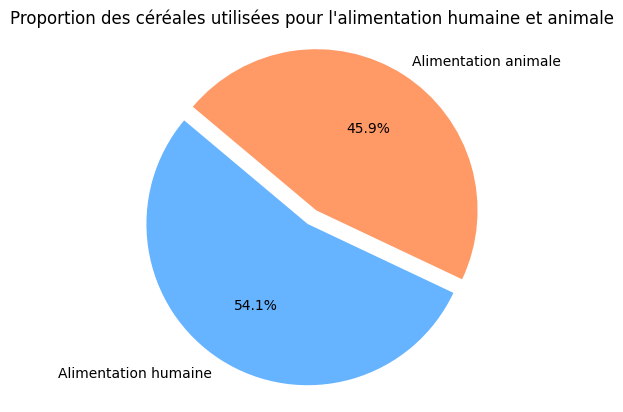

In [88]:
# Données pour le graphique secteur
labels = ['Alimentation humaine', 'Alimentation animale']
sizes = [total_nourriture_humaine, total_aliments_animaux]
colors = ['#66b3ff', '#ff9966']  # Couleurs personnalisées pour les deux secteurs
explode = (0.1, 0)  # Pour "exploser" la part alimentaire animale pour la rendre plus visible

# Création du graphique secteur
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, textprops={'color': 'black'})

# Titre
plt.title("Proportion des céréales utilisées pour l'alimentation humaine et animale")

# Affichage du graphique
plt.axis('equal')  # Assure que le graphique secteur soit un cercle
plt.show()

In [50]:
# Calcul de la répartir des céréales

# Convertir les résultats en millions de tonnes pour plus de lisibilité
total_nourriture_humaine_milliers_tonnes = total_nourriture_humaine / 1_000_000
total_aliments_animaux_milliers_tonnes = total_aliments_animaux / 1_000_000

# Affichage avec séparateurs de milliers et précision
print(f"Total utilisation pour l'alimentation humaine : {total_nourriture_humaine_milliers_tonnes:,.2f} millions de tonnes")
print(f"Total utilisation pour l'alimentation animale : {total_aliments_animaux_milliers_tonnes:,.2f} millions de tonnes")

Total utilisation pour l'alimentation humaine : 1,029,010.00 millions de tonnes
Total utilisation pour l'alimentation animale : 873,535.00 millions de tonnes


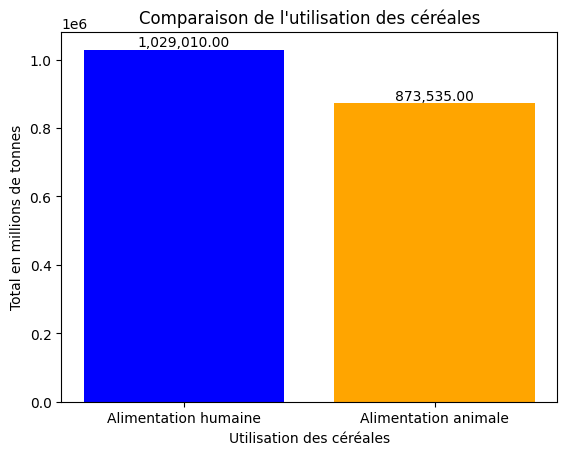

In [51]:
import matplotlib.pyplot as plt

# Données
categories = ['Alimentation humaine', 'Alimentation animale']
valeurs = [total_nourriture_humaine_milliers_tonnes, total_aliments_animaux_milliers_tonnes]

# Création du graphique à barres
plt.bar(categories, valeurs, color=['blue', 'orange'])

# Ajout du titre et des labels
plt.title("Comparaison de l'utilisation des céréales")
plt.xlabel("Utilisation des céréales")
plt.ylabel("Total en millions de tonnes")

# Affichage des valeurs au-dessus des barres
for i, v in enumerate(valeurs):
    plt.text(i, v + 0.1, f"{v:,.2f}", ha='center', va='bottom')

# Affichage du graphique
plt.show()






<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.6 - Pays avec la proportion de personnes sous-alimentée la plus forte en 2017</h3>
</div>

In [52]:
#Création de la colonne proportion par pays

analyse_2017['Proportion par pays (%)'] = (analyse_2017['sous_nutrition'] / analyse_2017['Population']) * 100
analyse_2017['Proportion par pays (%)'] = analyse_2017['Proportion par pays (%)'].round(2)
analyse_2017[['Zone', 'Proportion par pays (%)']].head()




,Zone,Proportion par pays (%)
0,Afghanistan,28.93
1,Afrique du Sud,5.44
2,Albanie,3.47
3,Algérie,3.14
4,Allemagne,0.00


In [53]:
#affichage après trie des 10 pires pays

# Trier par proportion et afficher les 10 pires pays avec 2 décimales
top_10_pires_pays = analyse_2017.sort_values(by='Proportion par pays (%)', ascending=False).head(10)
top_10_pires_pays['Proportion par pays (%)'] = top_10_pires_pays['Proportion par pays (%)'].round(2)

# Affichage du résultat
top_10_pires_pays[['Zone', 'Proportion par pays (%)']]



,Zone,Proportion par pays (%)
78,Haïti,48.26
157,République populaire démocratique de Corée,47.19
108,Madagascar,41.06
103,Libéria,38.28
100,Lesotho,38.25
183,Tchad,37.96
161,Rwanda,35.06
121,Mozambique,32.81
186,Timor-Leste,32.17
0,Afghanistan,28.93


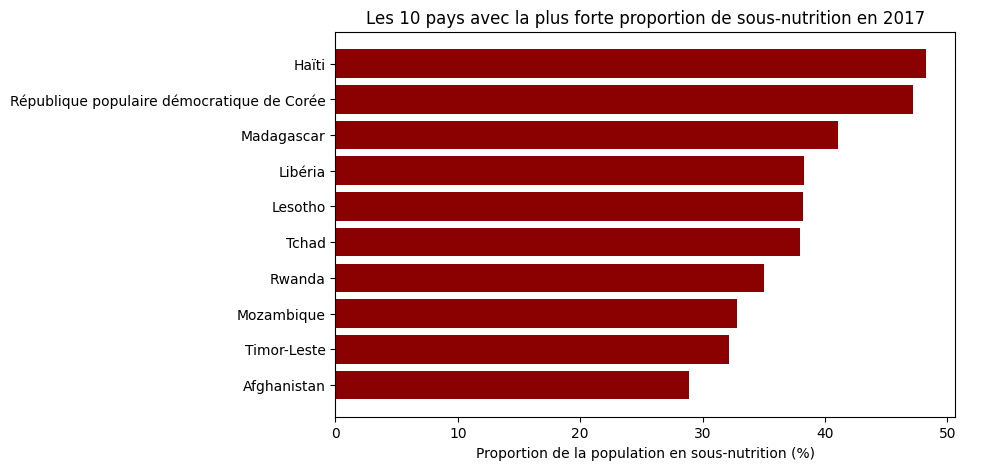

In [54]:
# Données des 10 pires pays
pays = top_10_pires_pays['Zone']
proportions = top_10_pires_pays['Proportion par pays (%)']

# Création du graphique avec une taille réduite
plt.figure(figsize=(8, 5))  # Taille réduite du graphique
plt.barh(pays, proportions, color='darkred')
plt.xlabel('Proportion de la population en sous-nutrition (%)')
plt.title("Les 10 pays avec la plus forte proportion de sous-nutrition en 2017")
plt.gca().invert_yaxis()  # Inverser l'ordre pour afficher le plus élevé en haut

# Affichage des valeurs sur les barres
for i, v in enumerate(proportions):
    plt.text(v + 1, i, f"{v}%", va='center', color='white')

# Affichage du graphique
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.7 - Pays qui ont le plus bénéficié d'aide alimentaire depuis 2013</h3>
</div>

In [55]:
#calcul du total de l'aide alimentaire par pays

total_aide_par_pays = aide_alimentaire.groupby('Zone')['Valeur'].sum().reset_index()

total_aide_par_pays.head()


,Zone,Valeur
0,Afghanistan,185452000
1,Algérie,81114000
2,Angola,5014000
3,Bangladesh,348188000
4,Bhoutan,2666000


In [56]:
#affichage après trie des 10 pays qui ont bénéficié le plus de l'aide alimentaire

top_10_aide = total_aide_par_pays.sort_values(by='Valeur', ascending=False).head(10)

top_10_aide

,Zone,Valeur
50,République arabe syrienne,1858943000
75,Éthiopie,1381294000
70,Yémen,1206484000
61,Soudan du Sud,695248000
60,Soudan,669784000
30,Kenya,552836000
3,Bangladesh,348188000
59,Somalie,292678000
53,République démocratique du Congo,288502000
43,Niger,276344000


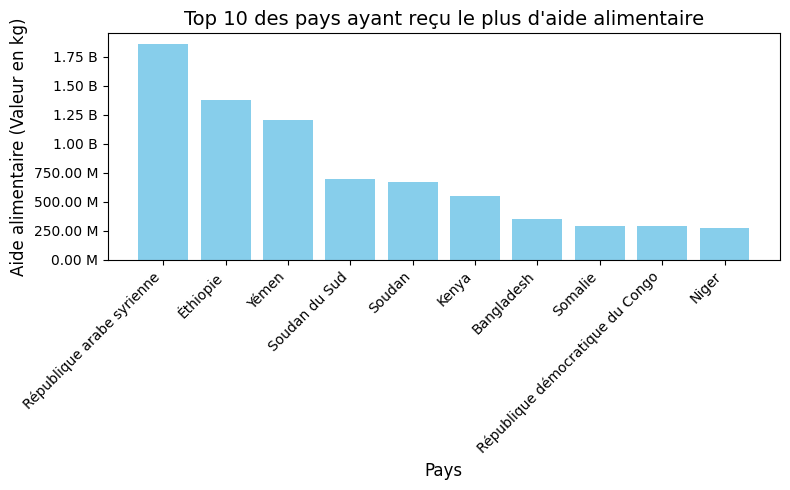

In [57]:
from matplotlib.ticker import FuncFormatter

# Affichage du top 10 des pays les plus aidés
top_10_aide = total_aide_par_pays.sort_values(by='Valeur', ascending=False).head(10)

# Création de l'histogramme
plt.figure(figsize=(8, 5))
plt.bar(top_10_aide['Zone'], top_10_aide['Valeur'], color='skyblue')

# Personnalisation du graphique
plt.title('Top 10 des pays ayant reçu le plus d\'aide alimentaire', fontsize=14)
plt.xlabel('Pays', fontsize=12)
plt.ylabel('Aide alimentaire (Valeur en kg)', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Formatter pour l'axe y
formatter = FuncFormatter(lambda x, pos: f'{x/1e9:.2f} B' if x >= 1e9 else f'{x/1e6:.2f} M')
plt.gca().yaxis.set_major_formatter(formatter)

# Affichage du graphique
plt.tight_layout()
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.8 - Evolution des 5 pays qui ont le plus bénéficiés de l'aide alimentaire entre 2013 et 2016</h3>
</div>

In [58]:
#Création d'un dataframe avec la zone, l'année et l'aide alimentaire puis groupby sur zone et année

evolution_aide_alimentaire = aide_alimentaire[['Zone', 'Année', 'Valeur']]
evolution_aide_alimentaire = evolution_aide_alimentaire.groupby(['Zone', 'Année']).sum().reset_index()

evolution_aide_alimentaire.head()


,Zone,Année,Valeur
0,Afghanistan,2013,128238000
1,Afghanistan,2014,57214000
2,Algérie,2013,35234000
3,Algérie,2014,18980000
4,Algérie,2015,17424000


In [59]:
#Création d'une liste contenant les 5 pays qui ont le plus bénéficiées de l'aide alimentaire

# Création d'une liste contenant les 5 pays ayant le plus bénéficié de l'aide alimentaire
top_5_aide_alimentaire = evolution_aide_alimentaire.groupby('Zone')['Valeur'].sum().sort_values(ascending=False).head(5).index.tolist()

# Affichage de la liste
top_5_aide_alimentaire


['République arabe syrienne', 'Éthiopie', 'Yémen', 'Soudan du Sud', 'Soudan']

In [60]:
#On filtre sur le dataframe avec notre liste

# Filtrage des données pour les 5 pays ayant le plus bénéficié de l'aide alimentaire
evolution_aide_top_5 = evolution_aide_alimentaire[evolution_aide_alimentaire['Zone'].isin(top_5_aide_alimentaire)]

# Affichage du DataFrame filtré
evolution_aide_top_5.head()


,Zone,Année,Valeur
157,République arabe syrienne,2013,563566000
158,République arabe syrienne,2014,651870000
159,République arabe syrienne,2015,524949000
160,République arabe syrienne,2016,118558000
189,Soudan,2013,330230000


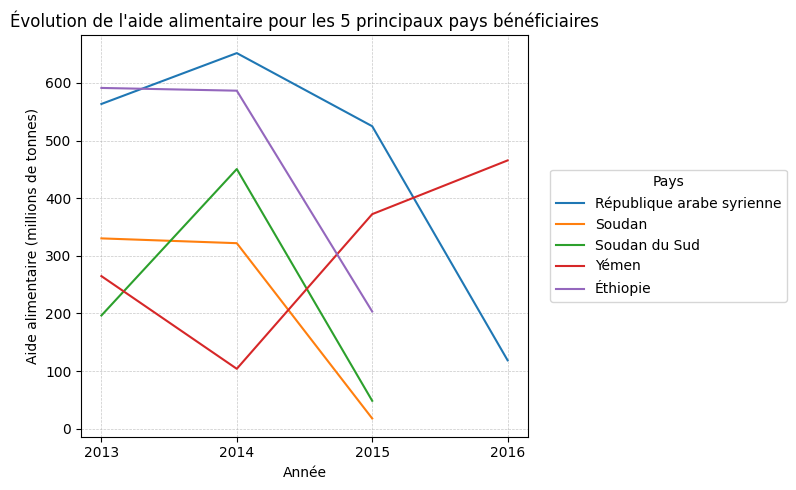

In [61]:
# Création du graphique
plt.figure(figsize=(8, 5))

# Tracer une courbe pour chaque pays
for zone in evolution_aide_top_5['Zone'].unique():
    data_zone = evolution_aide_top_5[evolution_aide_top_5['Zone'] == zone]
    plt.plot(
        data_zone['Année'],
        data_zone['Valeur'] / 1e6,  # Conversion des valeurs en millions de tonnes pour une meilleure lisibilité
        label=zone
    )

# Ajustement des axes
plt.xticks(ticks=[2013, 2014, 2015, 2016], labels=['2013', '2014', '2015', '2016'])  # Affiche uniquement les années
plt.xlabel("Année")
plt.ylabel("Aide alimentaire (millions de tonnes)")
plt.title("Évolution de l'aide alimentaire pour les 5 principaux pays bénéficiaires")

# Ajouter un quadrillage (grille)
plt.grid(visible=True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Déplacement de la légende en dehors du graphique
plt.legend(title="Pays", bbox_to_anchor=(1.05, 0.5), loc='center left', borderaxespad=0)

# Affichage du graphique
plt.tight_layout()  # Ajuste automatiquement les marges pour inclure la légende
plt.show()

In [62]:
# Affichage des pays avec l'aide alimentaire par année

# Groupement par pays et année avec la somme des valeurs d'aide alimentaire
aide_par_pays_annee = evolution_aide_alimentaire.groupby(['Zone', 'Année'])['Valeur'].sum().reset_index()

# Affichage des 10 premières lignes pour vérification
aide_par_pays_annee.head(10)


,Zone,Année,Valeur
0,Afghanistan,2013,128238000
1,Afghanistan,2014,57214000
2,Algérie,2013,35234000
3,Algérie,2014,18980000
4,Algérie,2015,17424000
5,Algérie,2016,9476000
6,Angola,2013,5000000
7,Angola,2014,14000
8,Bangladesh,2013,131018000
9,Bangladesh,2014,194628000


texte en gras<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.9 - Pays avec le moins de disponibilité par habitant</h3>
</div>

In [63]:
#Calcul de la disponibilité en kcal par personne par jour par pays

# Regroupement par pays et somme de la disponibilité alimentaire (Kcal/personne/jour)
dispo_kcal_par_pays = population_dispo_alimentaire.groupby('Zone')['Disponibilité alimentaire (Kcal/personne/jour)'].sum().reset_index()

dispo_kcal_par_pays.head()



,Zone,Disponibilité alimentaire (Kcal/personne/jour)
0,Afghanistan,2087.0
1,Afrique du Sud,3020.0
2,Albanie,3188.0
3,Algérie,3293.0
4,Allemagne,3503.0


In [64]:
#Affichage des 10 pays qui ont le moins de dispo alimentaire par personne

# Tri descendant sur la colonne 'Disponibilité alimentaire (Kcal/personne/jour)' pour afficher les pays avec la moins grande disponibilité
top_10_moins_dispo = dispo_kcal_par_pays.sort_values(by='Disponibilité alimentaire (Kcal/personne/jour)', ascending=True).head(10)

# Affichage des résultats
top_10_moins_dispo[['Zone', 'Disponibilité alimentaire (Kcal/personne/jour)']]


,Zone,Disponibilité alimentaire (Kcal/personne/jour)
128,République centrafricaine,1879.0
166,Zambie,1924.0
91,Madagascar,2056.0
0,Afghanistan,2087.0
65,Haïti,2089.0
133,République populaire démocratique de Corée,2093.0
151,Tchad,2109.0
167,Zimbabwe,2113.0
114,Ouganda,2126.0
154,Timor-Leste,2129.0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.10 - Pays avec le plus de disponibilité par habitant</h3>
</div>

In [65]:
#Affichage des 10 pays qui ont le plus de dispo alimentaire par personne

# Tri descendant sur la colonne 'Disponibilité alimentaire (Kcal/personne/jour)' pour afficher les pays avec la plus grande disponibilité
top_10_plus_dispo = dispo_kcal_par_pays.sort_values(by='Disponibilité alimentaire (Kcal/personne/jour)', ascending=False).head(10)

# Affichage des résultats
top_10_plus_dispo[['Zone', 'Disponibilité alimentaire (Kcal/personne/jour)']]


,Zone,Disponibilité alimentaire (Kcal/personne/jour)
11,Autriche,3770.0
16,Belgique,3737.0
159,Turquie,3708.0
171,États-Unis d'Amérique,3682.0
74,Israël,3610.0
72,Irlande,3602.0
75,Italie,3578.0
89,Luxembourg,3540.0
168,Égypte,3518.0
4,Allemagne,3503.0


<div style="border: 1px solid RGB(0,150,250);" >






<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.11 - Exemple de la Thaïlande pour le Manioc</h3>
</div>

In [66]:
# Filtrer les données pour inclure uniquement la Thaïlande

df_thailande = population_dispo_alimentaire[(population_dispo_alimentaire['Zone'] == 'Thaïlande') & (population_dispo_alimentaire['Produit'] == 'Manioc')]

df_thailande

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,...,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Année,Population,dispo_kcal
13809,Thaïlande,Manioc,vegetale,1.800000e+09,2.081000e+09,40.0,13.0,0.05,0.14,6264.0,...,1.250000e+09,871000000.0,1.511000e+09,3.022800e+10,0.0,0.0,0.0,2017.0,69209810.0,2.768392e+09


In [72]:
#Calcul de la sous nutrition en Thaïlande

# Filtrage des données pour la Thaïlande
thailande_2017 = analyse_2017[analyse_2017['Zone'] == 'Thaïlande']

# Calculs pour la Thaïlande
sous_nutrition_thailande = thailande_2017['sous_nutrition'].sum()
population_thailande = thailande_2017['Population'].sum()
pourcentage_thailande = (sous_nutrition_thailande / population_thailande) * 100

# Affichage des résultats
print("Nombre de personnes en sous-nutrition en Thaïlande en 2017 :", f"{sous_nutrition_thailande:,.0f}".replace(",", " "))
print("Population totale de la Thaïlande en 2017 :", f"{population_thailande:,.0f}".replace(",", " "))
print(f"Pourcentage de personnes en sous-nutrition en Thaïlande en 2017 : {pourcentage_thailande:.2f} %")



Nombre de personnes en sous-nutrition en Thaïlande en 2017 : 6 200 000
Population totale de la Thaïlande en 2017 : 69 209 810
Pourcentage de personnes en sous-nutrition en Thaïlande en 2017 : 8.96 %


In [73]:
# On calcule la proportion exportée en fonction de la production

# Récupération des données
production_manioc = df_thailande['Production'].values[0]  # Production totale de manioc
exportations_manioc = df_thailande['Exportations - Quantité'].values[0]  # Exportations totales de manioc

# Calcul de la proportion exportée
proportion_exportee = (exportations_manioc / production_manioc) * 100

# Affichage des résultats
print(f"Production totale de manioc en Thaïlande en 2017 : {production_manioc:,.0f} tonnes")
print(f"Exportations de manioc en Thaïlande en 2017 : {exportations_manioc:,.0f} tonnes")
print(f"Proportion exportée par rapport à la production : {proportion_exportee:.2f} %")



Production totale de manioc en Thaïlande en 2017 : 30,228,000,000 tonnes
Exportations de manioc en Thaïlande en 2017 : 25,214,000,000 tonnes
Proportion exportée par rapport à la production : 83.41 %


In [78]:
#Top 10 des produits en disponibilité intérieure (argumentaire Section 3.11)

# Filtrer les données pour la Thaïlande
dispo_thailande = dispo_alimentaire[dispo_alimentaire['Zone'] == 'Thaïlande']

# Trier les produits par "Disponibilité intérieure" (en ordre décroissant)
produits_tries = dispo_thailande.sort_values(by='Disponibilité intérieure', ascending=False)

# Sélectionner les 10 produits les plus disponibles
top_10_produits = produits_tries.head(10)

# Afficher les résultats
print("Top 10 des produits les plus disponibles en Thaïlande en 2017 :")
for index, row in top_10_produits.iterrows():
    print(f"- Produit : {row['Produit']}, Disponibilité intérieure : {row['Disponibilité intérieure']:,} tonnes")


Top 10 des produits les plus disponibles en Thaïlande en 2017 :
- Produit : Sucre, canne, Disponibilité intérieure : 100,096.0 tonnes
- Produit : Riz (Eq Blanchi), Disponibilité intérieure : 13,605.0 tonnes
- Produit : Manioc, Disponibilité intérieure : 6,264.0 tonnes
- Produit : Maïs, Disponibilité intérieure : 4,678.0 tonnes
- Produit : Fruits, Autres, Disponibilité intérieure : 3,791.0 tonnes
- Produit : Légumes, Autres, Disponibilité intérieure : 3,557.0 tonnes
- Produit : Sucre Eq Brut, Disponibilité intérieure : 2,527.0 tonnes
- Produit : Lait - Excl Beurre, Disponibilité intérieure : 2,147.0 tonnes
- Produit : Bière, Disponibilité intérieure : 2,040.0 tonnes
- Produit : Blé, Disponibilité intérieure : 1,882.0 tonnes


In [80]:
# Top 10 des produits les plus produits (Argumentaire Section 3.11)

# Trier les produits par "Production" (en ordre décroissant)
produits_tries_production = dispo_thailande.sort_values(by='Production', ascending=False)

# Sélectionner les 10 produits les plus produits
top_10_produits_production = produits_tries_production.head(10)

# Afficher les résultats
print("Top 10 des produits les plus produits en Thaïlande en 2017 :")
for index, row in top_10_produits_production.iterrows():
    print(f"- Produit : {row['Produit']}, Production : {row['Production']:,} tonnes")

Top 10 des produits les plus produits en Thaïlande en 2017 :
- Produit : Sucre, canne, Production : 100,096,000,000.0 tonnes
- Produit : Manioc, Production : 30,228,000,000.0 tonnes
- Produit : Riz (Eq Blanchi), Production : 24,054,000,000.0 tonnes
- Produit : Sucre Eq Brut, Production : 10,024,000,000.0 tonnes
- Produit : Fruits, Autres, Production : 6,141,000,000.0 tonnes
- Produit : Maïs, Production : 5,063,000,000.0 tonnes
- Produit : Légumes, Autres, Production : 3,643,000,000.0 tonnes
- Produit : Bière, Production : 2,273,000,000.0 tonnes
- Produit : Ananas, Production : 2,209,000,000.0 tonnes
- Produit : Huile de Palme, Production : 1,970,000,000.0 tonnes


<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 6 - Analyse complémentaires</h2>
</div>

In [81]:
#Rajouter en dessous toutes les analyses complémtaires suite à la demande de mélanie :
#"et toutes les infos que tu trouverais utiles pour mettre en relief les pays qui semblent être
#le plus en difficulté au niveau alimentaire"

#Comparaison des disponibilités alimentaires moyennes

# Calcul de la moyenne des disponibilités alimentaires pour les deux groupes
moyenne_plus_dispo = top_10_plus_dispo['Disponibilité alimentaire (Kcal/personne/jour)'].mean()
moyenne_moins_dispo = top_10_moins_dispo['Disponibilité alimentaire (Kcal/personne/jour)'].mean()

# Calcul de l'écart entre les deux moyennes
ecart_moyen = moyenne_plus_dispo - moyenne_moins_dispo

# Affichage des résultats
print(f"Moyenne des disponibilités alimentaires pour les 10 pays ayant la plus grande disponibilité : {moyenne_plus_dispo:.1f} kcal/personne/jour")
print(f"Moyenne des disponibilités alimentaires pour les 10 pays ayant la plus faible disponibilité : {moyenne_moins_dispo:.1f} kcal/personne/jour")
print(f"Écart moyen entre les deux groupes : {ecart_moyen:.1f} kcal/personne/jour")

Moyenne des disponibilités alimentaires pour les 10 pays ayant la plus grande disponibilité : 3624.8 kcal/personne/jour
Moyenne des disponibilités alimentaires pour les 10 pays ayant la plus faible disponibilité : 2060.5 kcal/personne/jour
Écart moyen entre les deux groupes : 1564.3 kcal/personne/jour


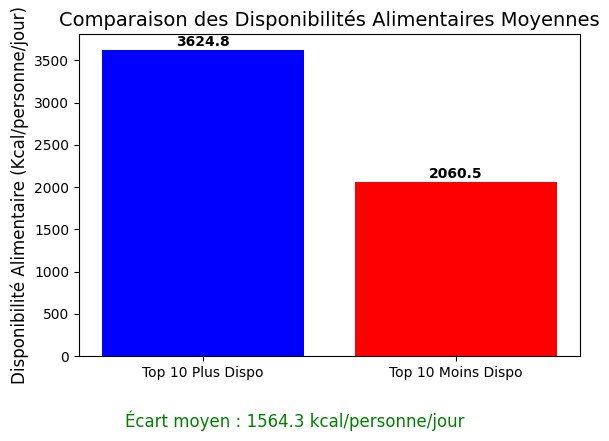

In [85]:
# Création des barres
labels = ['Top 10 Plus Dispo', 'Top 10 Moins Dispo']
valeurs = [moyenne_plus_dispo, moyenne_moins_dispo]

# Affichage du graphique
plt.figure(figsize=(6, 4))
plt.bar(labels, valeurs, color=['blue', 'red'])

# Ajout des valeurs sur les barres
for i, v in enumerate(valeurs):
    plt.text(i, v + 10, f"{v:.1f}", ha='center', va='bottom', fontweight='bold')

# Ajout des titres et labels
plt.title("Comparaison des Disponibilités Alimentaires Moyennes", fontsize=14)
plt.ylabel("Disponibilité Alimentaire (Kcal/personne/jour)", fontsize=12)

# Affichage de l'écart moyen dans le graphique
plt.figtext(0.5, -0.08, f"Écart moyen : {ecart_moyen:.1f} kcal/personne/jour", ha="center", fontsize=12, color="green")

# Affichage
plt.tight_layout()
plt.show()